# **Import Libraries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from ydata_profiling import ProfileReport
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# **Features**
* **course_id**: A unique identifier for each course.
* **course_title**: The title or name of the course.
* **is_paid**:  Indicates whether the course is paid or free.
* **price**: The price of the course. If the course is free.
* **num_subscribers**: The number of subscribers enrolled in the course.
* **num_reviews**: The number of reviews received for the course.
* **num_lectures**: The number of lectures or lessons in the course.
* **level**: The difficulty level of the course (e.g., Beginner, Intermediate, All Levels, Expert).
* **content_duration**: The total duration of the course content, typically in hours or minutes.
* **published_timestamp**: The timestamp when the course was published.
* **subject**: The subject or category of the course.

# **Read Dataset**

In [8]:
uc = pd.read_csv('/kaggle/input/udemy-courses-dataset/UdemyCoursesDataset.csv')

# **Profilling dataset using pandas profilling**

In [9]:
profile = ProfileReport(uc, title='dataset profiling')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Pre_processing & EDA** 

In [10]:
uc.head(10)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
5,1122832,#6 Piano Hand Coordination: Play Open 10 Balla...,True,65,2015,3,21,Intermediate Level,44 mins,2017-03-08T17:53:36Z,Musical Instruments
6,1123184,#7 Piano Hand Coordination: Play Piano Runs in...,True,65,2015,2,25,Intermediate Level,1 hour,2017-03-08T18:09:32Z,Musical Instruments
7,768028,* An Integrated Approach to the Fundamentals o...,True,200,134,14,123,All Levels,5.5 hours,2016-03-15T17:23:07Z,Business Finance
8,206592,:::Beginners Guide To Creating Amazing Images ...,True,25,72,5,17,Beginner Level,1 hour,2014-04-29T19:50:31Z,Graphic Design
9,738910,[Value Investing] Where White People Keep Thei...,True,200,2715,70,20,Expert Level,4 hours,2016-05-25T21:04:41Z,Business Finance


In [11]:
uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB



**problems**:
* price >> must be numerical
* puplished_timestamp >> datetime

In [12]:
uc['price'].unique()

array(['35', '75', '65', '200', '25', '100', '20', '40', '30', '45',
       '185', '120', '105', '50', 'Free', '145', '55', '85', '110', '150',
       '95', '180', '125', '60', '90', '195', '80', '70', '140', '190',
       '115', '130', '170', '175', '165', '135', '155', '160'],
      dtype=object)

In [13]:
# free must convert ot zero to change data type
uc['price']= uc['price'].replace("Free", 0)


In [14]:
# change data type
uc['price'] = uc['price'].astype(int)

uc['published_timestamp'] = pd.to_datetime(uc['published_timestamp'])

In [15]:
# check changes
uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3682 non-null   int64              
 1   course_title         3682 non-null   object             
 2   is_paid              3682 non-null   bool               
 3   price                3682 non-null   int64              
 4   num_subscribers      3682 non-null   int64              
 5   num_reviews          3682 non-null   int64              
 6   num_lectures         3682 non-null   int64              
 7   level                3682 non-null   object             
 8   content_duration     3682 non-null   object             
 9   published_timestamp  3682 non-null   datetime64[ns, UTC]
 10  subject              3682 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 291.4+ KB


<Axes: >

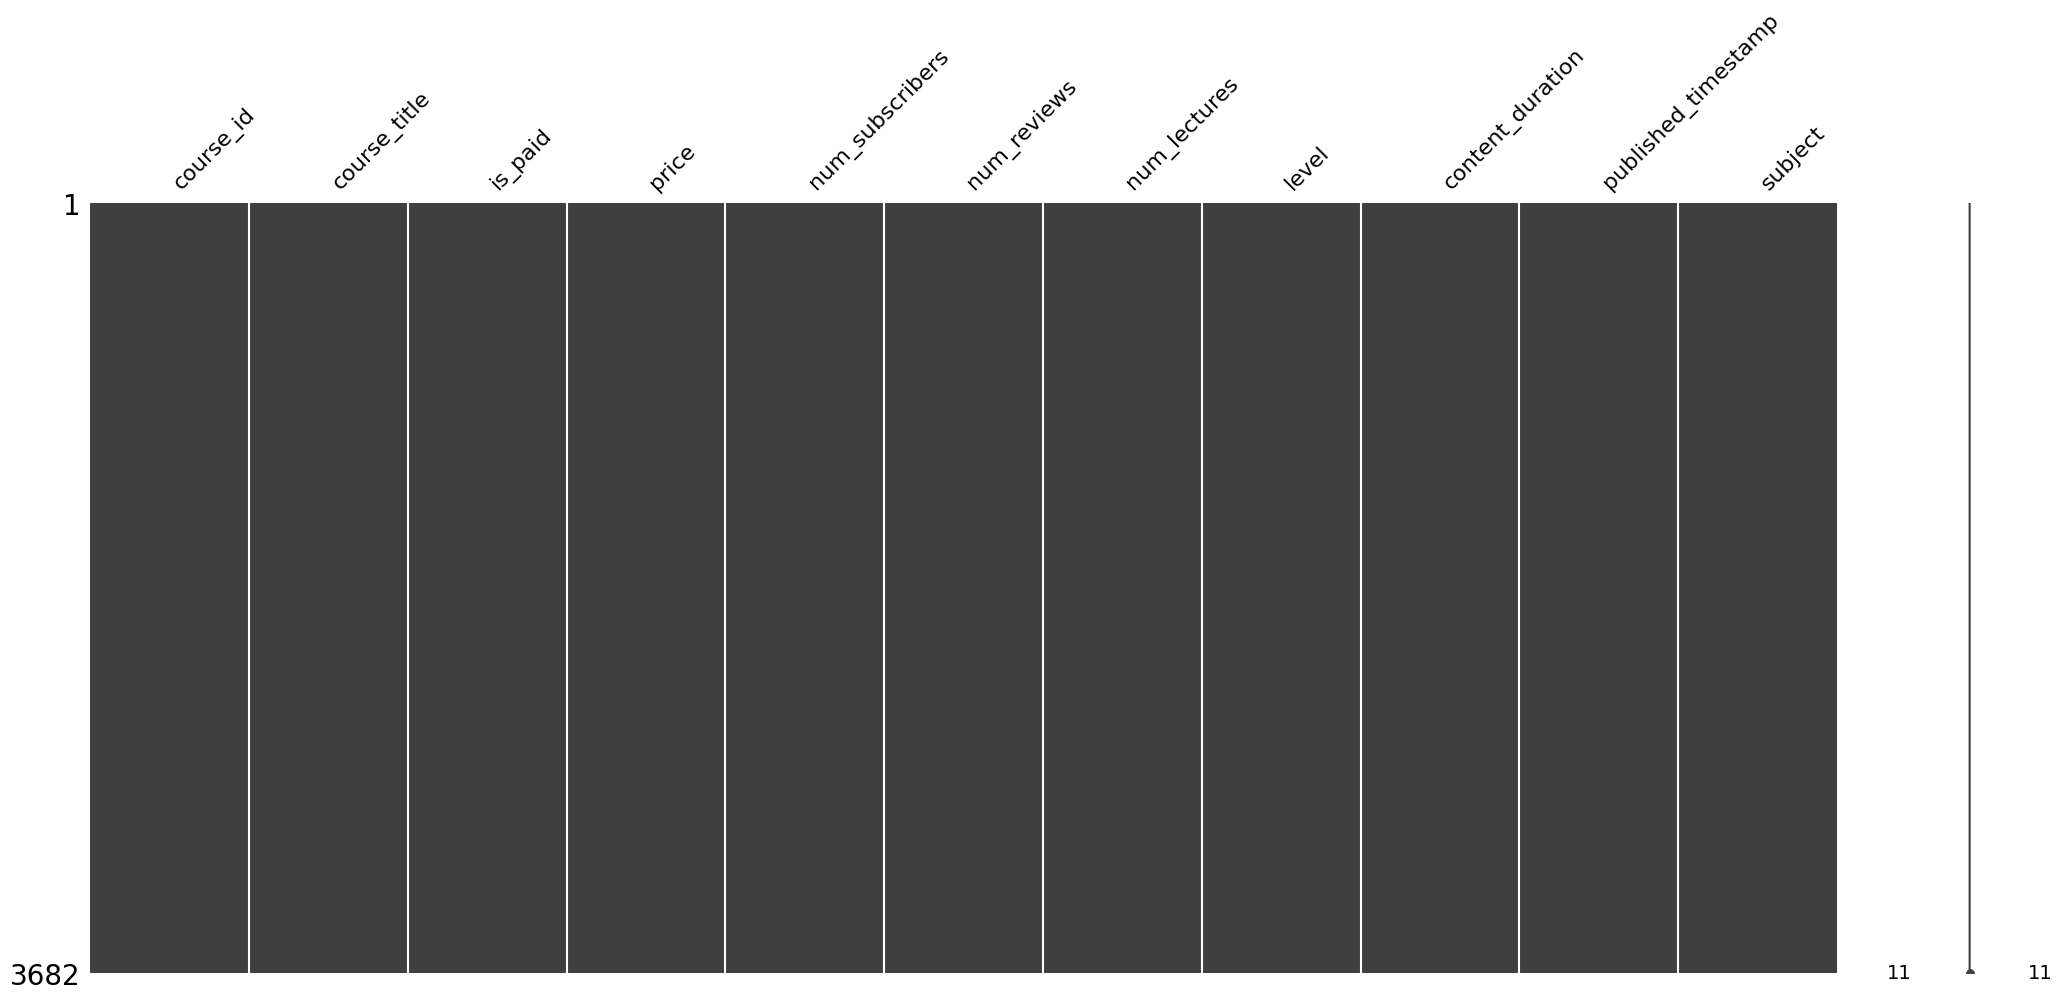

In [16]:
msno.matrix(uc)

**check duplicated data**

In [17]:
# count duplicated data
uc.duplicated().sum()

6

In [18]:
# remove duplicates
uc = uc.drop_duplicates(keep='last')

In [19]:
uc.duplicated().sum()

0

**split timestamp column to create a column for year and month**

In [20]:
uc['year'] = uc['published_timestamp'].dt.year

In [21]:
uc['month_name'] = uc['published_timestamp'].dt.month_name()

**create a column contain course time duration as bins**

In [22]:
# Function to convert string to hours
def convert_to_hours(duration):
    if 'hour' in duration:
        # Extract number of hours and convert to float
        hours = float(duration.split(' ')[0].replace('hour', '').replace('hours', ''))
        return hours
    elif 'min' in duration:
        # Extract number of minutes and convert to hours
        minutes = float(duration.split(' ')[0].replace('min', '').replace('mins', ''))
        return minutes / 60
    return 0

# Apply the function and create a new column 'content_duration_in_hours'
uc['content_duration_in_hours'] = uc['content_duration'].apply(convert_to_hours)

In [23]:
uc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 0 to 3681
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   course_id                  3676 non-null   int64              
 1   course_title               3676 non-null   object             
 2   is_paid                    3676 non-null   bool               
 3   price                      3676 non-null   int64              
 4   num_subscribers            3676 non-null   int64              
 5   num_reviews                3676 non-null   int64              
 6   num_lectures               3676 non-null   int64              
 7   level                      3676 non-null   object             
 8   content_duration           3676 non-null   object             
 9   published_timestamp        3676 non-null   datetime64[ns, UTC]
 10  subject                    3676 non-null   object             
 11  year     

**Detect outliers**

In [24]:
uc.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,year,content_duration_in_hours
count,3.676000e+03,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000
mean,6.765390e+05,66.063656,3187.668934,156.205114,40.096572,2015.432807,4.093145
std,3.434354e+05,61.014309,9483.366476,935.682615,50.407036,1.185215,6.056040
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,2011.000000,0.000000
25%,4.079370e+05,20.000000,111.000000,4.000000,15.000000,2015.000000,1.000000
50%,6.881680e+05,45.000000,912.000000,18.000000,25.000000,2016.000000,2.000000
75%,9.616435e+05,95.000000,2544.000000,67.000000,46.000000,2016.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,2017.000000,78.500000


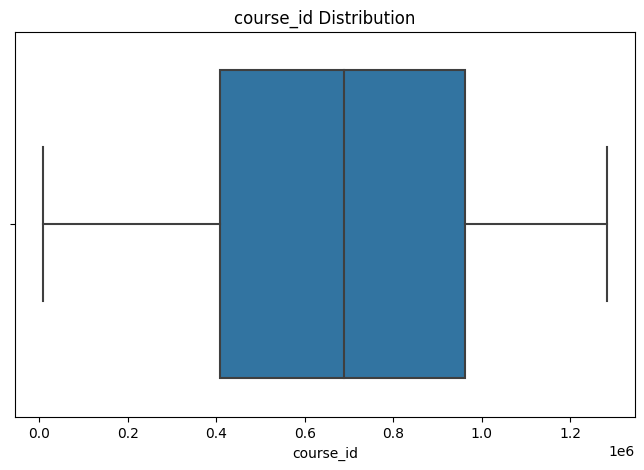

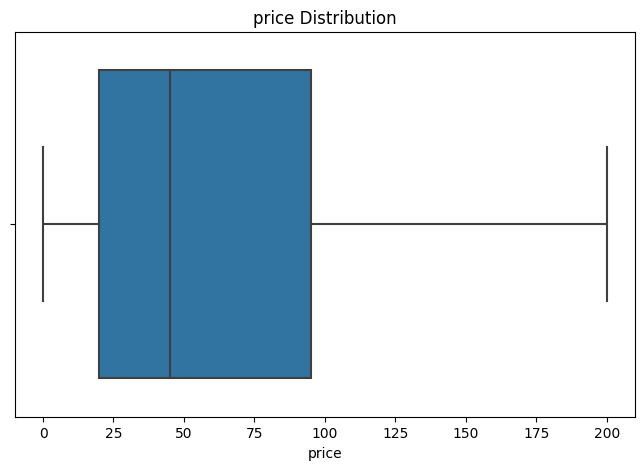

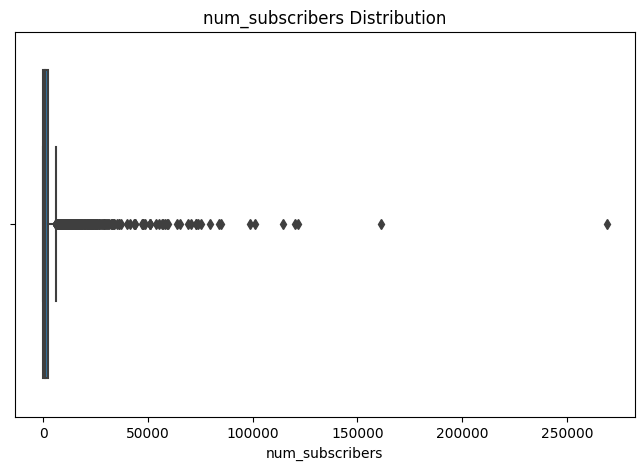

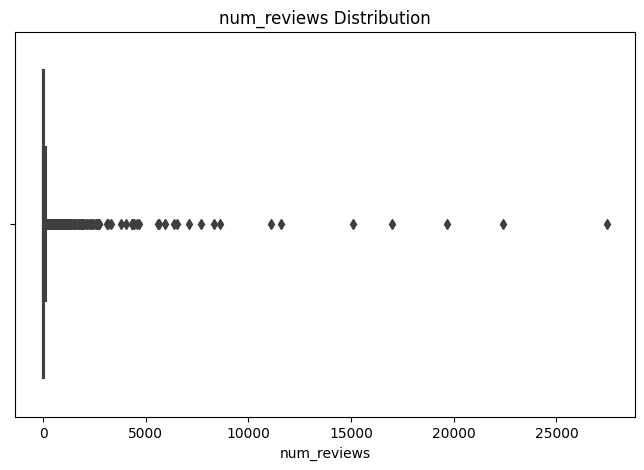

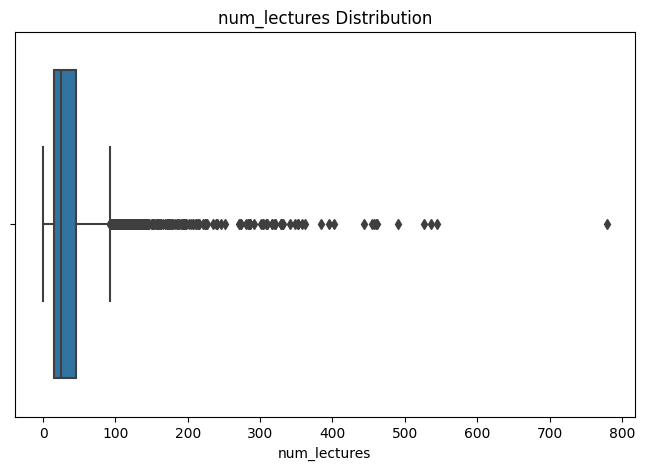

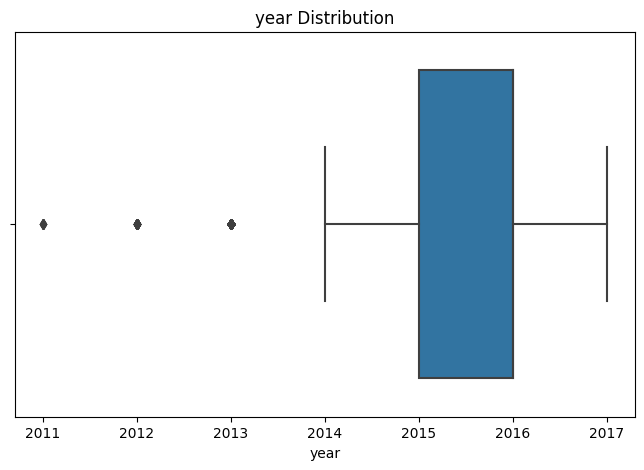

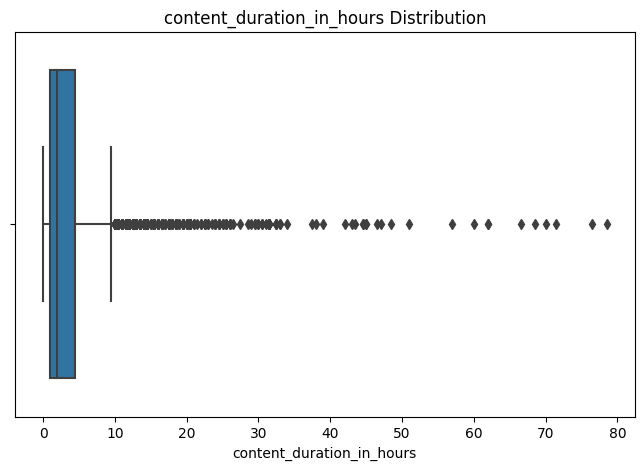

In [25]:
def draw_box(uc, columns):
    # Select only numeric columns
    numeric_columns = uc[columns].select_dtypes(include=['number']).columns

    if numeric_columns.empty:
        print("No numeric columns found to plot.")
        return

    for col in numeric_columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=uc[col]).set(title=f'{col} Distribution')
        plt.show()

# Example usage
draw_box(uc, uc.columns)

I saw it isn't outliers because it's normal that some courses have high number_lecturess, num_reviews and num_of subscribtion.

In [26]:
uc['is_paid'].value_counts().reset_index()

,is_paid,count
0,True,3366
1,False,310


In [27]:
uc['price'].value_counts().head(10).reset_index()

,price,count
0,20,827
1,50,468
2,0,310
3,200,295
4,40,216
5,30,170
6,25,153
7,95,152
8,100,133
9,195,127


In [28]:
uc['num_subscribers'].value_counts().reset_index()

,num_subscribers,count
0,0,65
1,1,49
2,5,28
3,2,27
4,3,26
...,...,...
2193,4284,1
2194,2096,1
2195,3523,1
2196,1685,1


In [29]:
uc['num_reviews'].value_counts().reset_index()

,num_reviews,count
0,0,286
1,1,184
2,2,166
3,3,161
4,4,127
...,...,...
506,1445,1
507,1141,1
508,398,1
509,230,1


In [30]:
uc['level'].value_counts().reset_index()

,level,count
0,All Levels,1928
1,Beginner Level,1269
2,Intermediate Level,421
3,Expert Level,58


In [31]:
uc['content_duration'].value_counts().reset_index()

,content_duration,count
0,1 hour,606
1,1.5 hours,506
2,2 hours,419
3,2.5 hours,269
4,3 hours,248
...,...,...
104,8 mins,1
105,31 hours,1
106,27 mins,1
107,29 mins,1


In [32]:
uc['subject'].value_counts().reset_index()

,subject,count
0,Web Development,1199
1,Business Finance,1195
2,Musical Instruments,680
3,Graphic Design,602


# **Questions ???**

**1. Most popular subjects based on number of subscribers**

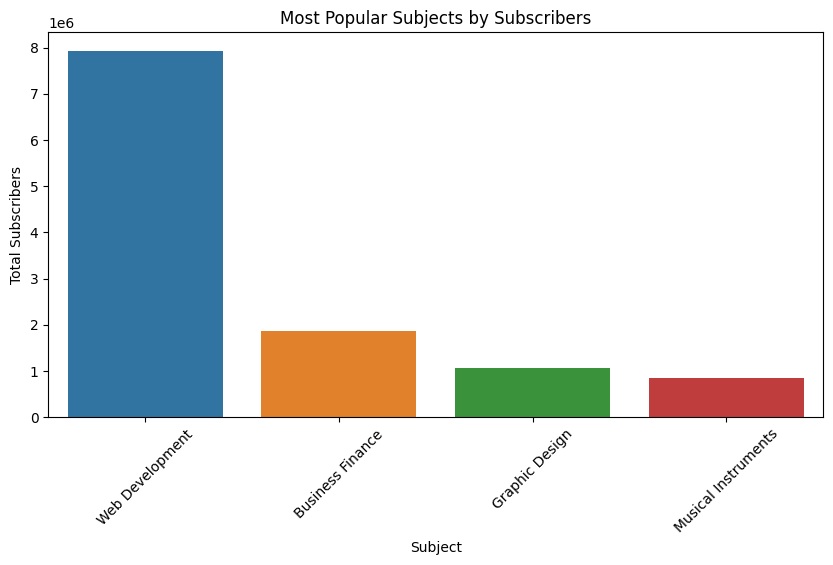

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(x=uc.groupby('subject')['num_subscribers'].sum().sort_values(ascending=False).index,
            y=uc.groupby('subject')['num_subscribers'].sum().sort_values(ascending=False).values)
plt.xlabel("Subject")
plt.ylabel("Total Subscribers")
plt.title("Most Popular Subjects by Subscribers")
plt.xticks(rotation=45)
plt.show()

**2. Top courses by number of subscribers**

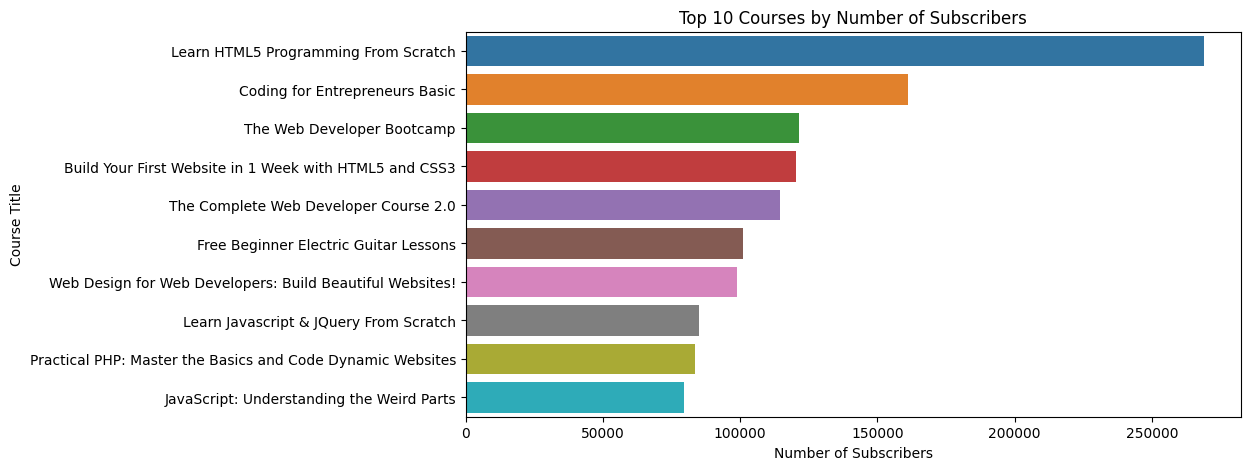

In [34]:
top_courses = uc[['course_title', 'num_subscribers']].sort_values(by='num_subscribers', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_courses['course_title'], x=top_courses['num_subscribers'], orient='h')
plt.xlabel("Number of Subscribers")
plt.ylabel("Course Title")
plt.title("Top 10 Courses by Number of Subscribers")
plt.show()

**3. Relationship between number of lectures and number of subscribers**

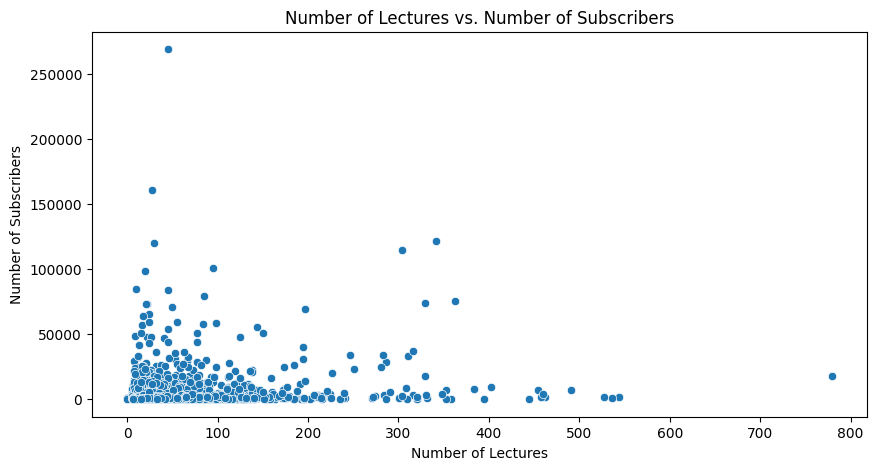

In [35]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=uc['num_lectures'], y=uc['num_subscribers'])
plt.xlabel("Number of Lectures")
plt.ylabel("Number of Subscribers")
plt.title("Number of Lectures vs. Number of Subscribers")
plt.show()

**4. Relationship between course price and number of subscribers**

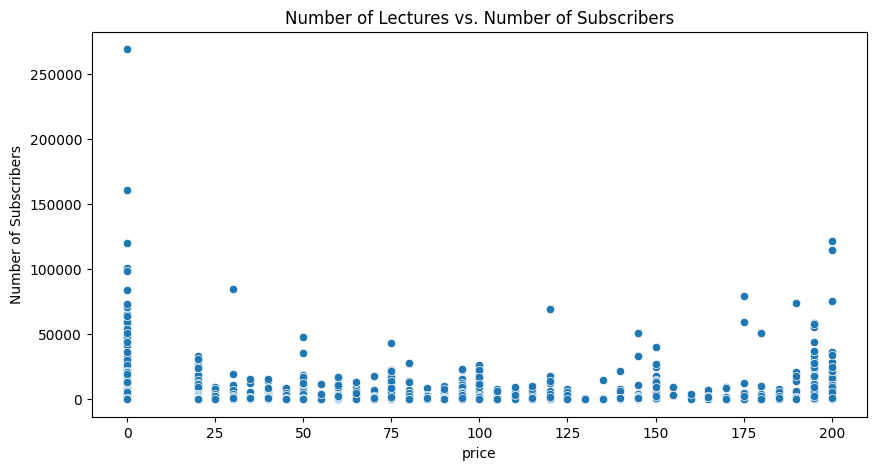

In [36]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=uc['price'], y=uc['num_subscribers'])
plt.xlabel("price")
plt.ylabel("Number of Subscribers")
plt.title("Number of Lectures vs. Number of Subscribers")
plt.show()

**5. Most popular course levels**

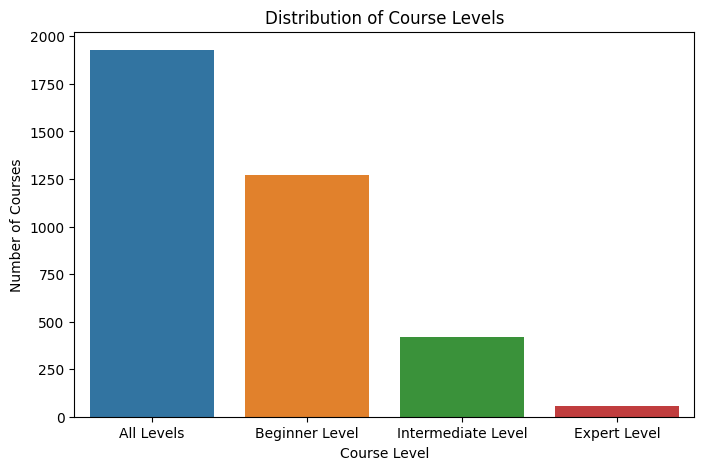

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x=uc['level'], order=uc['level'].value_counts().index)
plt.xlabel("Course Level")
plt.ylabel("Number of Courses")
plt.title("Distribution of Course Levels")
plt.show()

**6. Do free courses attract more subscribers?**

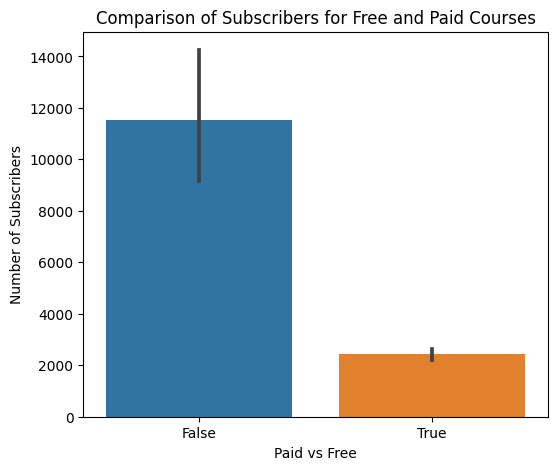

In [38]:
plt.figure(figsize=(6, 5))
sns.barplot(x=uc['is_paid'], y=uc['num_subscribers'])
plt.xlabel("Paid vs Free")
plt.ylabel("Number of Subscribers")
plt.title("Comparison of Subscribers for Free and Paid Courses")
plt.show()

**7. Impact of ratings on number of subscribers**

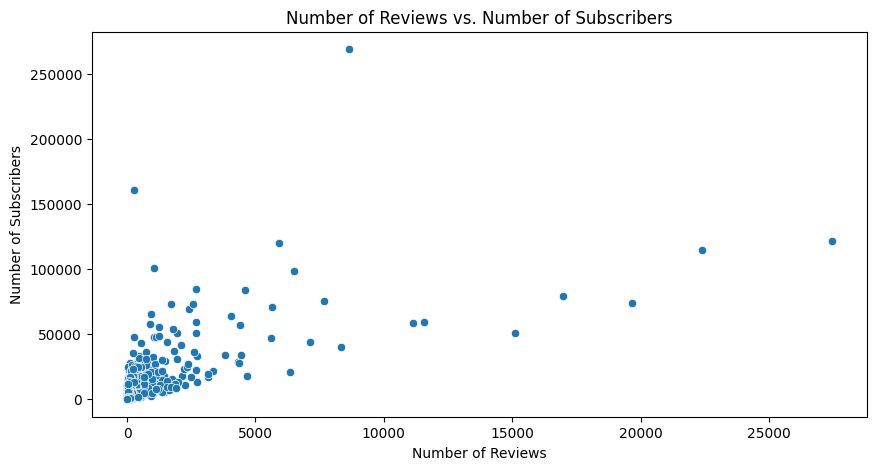

In [39]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=uc['num_reviews'], y=uc['num_subscribers'])
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Subscribers")
plt.title("Number of Reviews vs. Number of Subscribers")
plt.show()

**8. Impact of course length on subscriber count**

In [40]:
uc['content_duration'].isna().sum()

0

In [41]:
uc['content_duration'].unique()

array(['1.5 hours', '1 hour', '37 mins', '44 mins', '5.5 hours',
       '4 hours', '31 mins', '2.5 hours', '6.5 hours', '3 hours',
       '8.5 hours', '4.5 hours', '9.5 hours', '2 hours', '3.5 hours',
       '9 hours', '5 hours', '36 mins', '16 hours', '32 mins', '14 hours',
       '35 mins', '6 hours', '41 mins', '7.5 hours', '14.5 hours',
       '24.5 hours', '33 mins', '29 hours', '13.5 hours', '42 mins',
       '33 hours', '12.5 hours', '8 hours', '7 hours', '34 mins',
       '11.5 hours', '62 hours', '12 hours', '39 mins', '19 mins',
       '15.5 hours', '10.5 hours', '21 hours', '68.5 hours', '19.5 hours',
       '20.5 hours', '22 hours', '10 hours', '38 mins', '43 mins',
       '40 mins', '24 hours', '13 hours', '31.5 hours', '44.5 hours',
       '17.5 hours', '48.5 hours', '60 hours', '11 hours', '27.5 hours',
       '18.5 hours', '25.5 hours', '22.5 hours', '16.5 hours', '30 mins',
       '57 hours', '45 hours', '20 hours', '39 hours', '34 hours',
       '25 hours', '26 hours'

In [42]:
uc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 0 to 3681
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   course_id                  3676 non-null   int64              
 1   course_title               3676 non-null   object             
 2   is_paid                    3676 non-null   bool               
 3   price                      3676 non-null   int64              
 4   num_subscribers            3676 non-null   int64              
 5   num_reviews                3676 non-null   int64              
 6   num_lectures               3676 non-null   int64              
 7   level                      3676 non-null   object             
 8   content_duration           3676 non-null   object             
 9   published_timestamp        3676 non-null   datetime64[ns, UTC]
 10  subject                    3676 non-null   object             
 11  year     

In [48]:
max_duration = uc['content_duration_in_hours'].max()  # Get the max duration value

# Define bins properly
bins = [0, 2, 5, 10, 20, np.inf]  # Upper limit set to infinity

# Ensure labels match bins (5 bins → 5 labels)
labels = ['Very Short (0-2h)', 'Short (2-5h)', 'Medium (5-10h)', 'Long (10-20h)', 'Very Long (>20h)']

# Create a new categorical column
uc['duration_category'] = pd.cut(uc['content_duration_in_hours'], bins=bins, labels=labels, include_lowest=True)

# Display the DataFrame with the new column
print(uc[['content_duration', 'content_duration_in_hours', 'duration_category']])

     content_duration  content_duration_in_hours  duration_category
0           1.5 hours                   1.500000  Very Short (0-2h)
1              1 hour                   1.000000  Very Short (0-2h)
2           1.5 hours                   1.500000  Very Short (0-2h)
3              1 hour                   1.000000  Very Short (0-2h)
4             37 mins                   0.616667  Very Short (0-2h)
...               ...                        ...                ...
3677          4 hours                   4.000000       Short (2-5h)
3678          5 hours                   5.000000       Short (2-5h)
3679        6.5 hours                   6.500000     Medium (5-10h)
3680          2 hours                   2.000000  Very Short (0-2h)
3681        1.5 hours                   1.500000  Very Short (0-2h)

[3676 rows x 3 columns]


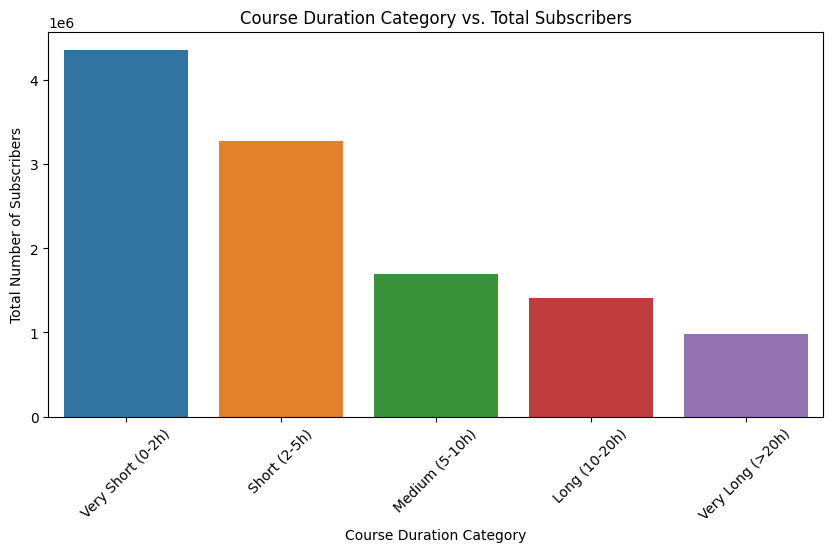

In [49]:
# Aggregate subscribers by duration category
duration_summary = uc.groupby('duration_category')['num_subscribers'].sum().reset_index()

# Plot the updated visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=duration_summary['duration_category'], y=duration_summary['num_subscribers'])
plt.xlabel("Course Duration Category")
plt.ylabel("Total Number of Subscribers")
plt.title("Course Duration Category vs. Total Subscribers")
plt.xticks(rotation=45)
plt.show()

**9. Average price per subject**

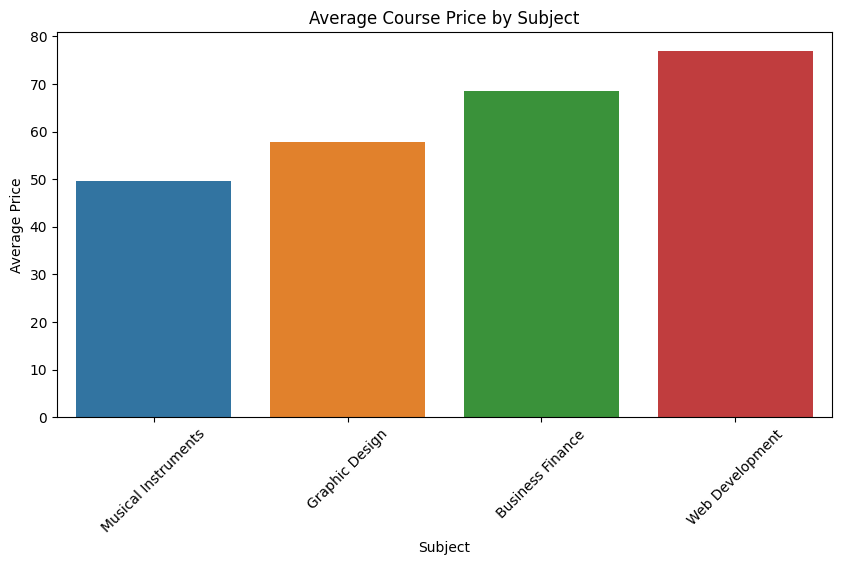

In [45]:
avg_price = uc.groupby('subject')['price'].mean().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.xlabel("Subject")
plt.ylabel("Average Price")
plt.title("Average Course Price by Subject")
plt.xticks(rotation=45)
plt.show()

**10. Trend of course popularity over time**

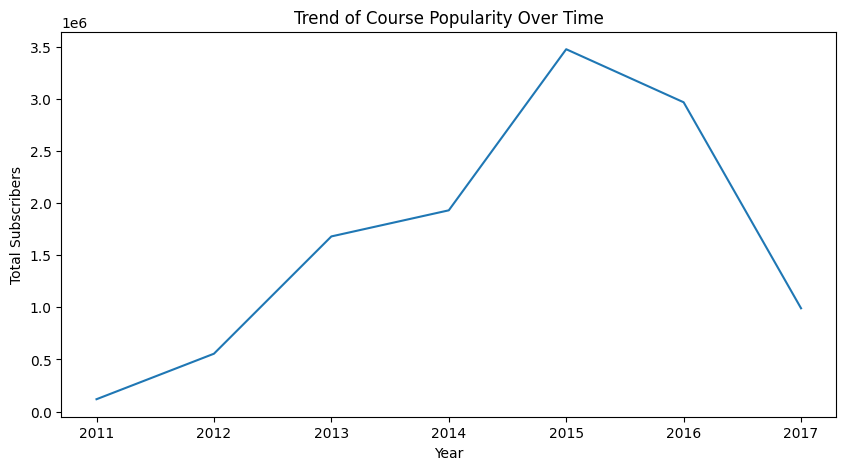

In [46]:
yearly_subs = uc.groupby('year')['num_subscribers'].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_subs.index, y=yearly_subs.values)
plt.xlabel("Year")
plt.ylabel("Total Subscribers")
plt.title("Trend of Course Popularity Over Time")
plt.show()

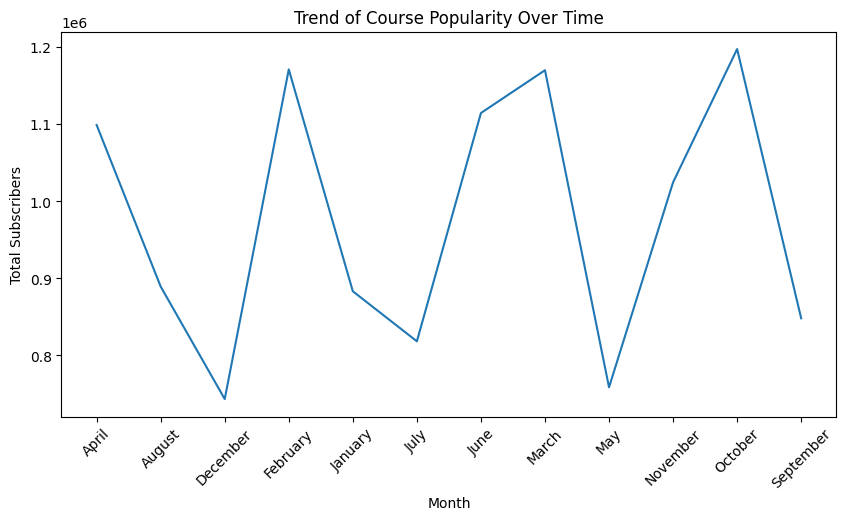

In [47]:
month_subs = uc.groupby('month_name')['num_subscribers'].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=month_subs.index, y=month_subs.values)
plt.xlabel("Month")
plt.ylabel("Total Subscribers")
plt.title("Trend of Course Popularity Over Time")
plt.xticks(rotation=45)
plt.show()

# **Thanks for my efforts and your watch and if you find any things can be added please tell me!!!**